### Project: Question-Answering System on Private Documents Using OpenAI, Pinecone and LangChain

#### Project Pipeline:- 

1. Prepare the Document (once per document)
    
    a. Load the data into LangChain Documents.
    
    b. Spilt the documents into Chunks.
    
    c. Embed the chunks into numeric vectors.
    
    d. Save the chunks and the embeddings to a vector database.

2. Search (once per query)

    a. Embed the user's question (using the same embedding model API used earlier).

    b. Using the question's embedding and the chunk embeddings, rank the vectors by similarity to the question's embedding. The nearest vectors represent chunks similar to the question.

3. Ask (once per query)

    a. Insert the question and the most relevant chunks into a message to a GPT Model.

    b. Return GPT's answer.

------------------------------------------------------------------------------------

#### Project Demo

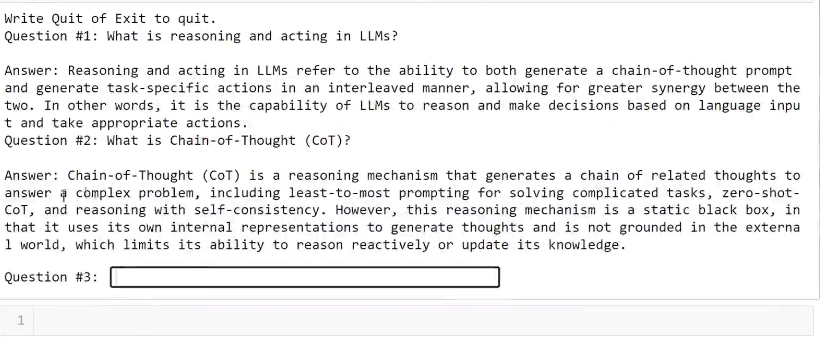

#### Loading Custom (Private) PDF Documents using `LangChain Document Loader`. These Document loaders transform data from a specific format into the LangChain Document format.

In [4]:
# Load the ENV File
import os
from dotenv import find_dotenv, load_dotenv
load_dotenv(find_dotenv(), override=True)
print("ENV File Loaded")

ENV File Loaded


In [13]:
def load_document(file:str):
    """Function will take PDF file as an argument and return text content.
    file: PDF File
    """
    from langchain.document_loaders import PyPDFLoader

    print(f"Loading '{file}'")
    loader = PyPDFLoader(file_path=file)
    data = loader.load() # This will return a list of Langchain Documents, one document for each page
    return data

#### Running/Testing Code

In [18]:
# Loading Local PDF File
data = load_document(file="us_constitution.pdf")
# print(data[1].page_content) # It's the 2nd page of the PDF, as the indexing starts from 0
# print(data[1].metadata)

# Loading PDF File Through URL
# data = load_document(file="paste the URL here")

print(f"You have {len(data)} pages in your data")
print(f"There are {len(data[1].page_content)} characters in the page")

Loading 'us_constitution.pdf'
You have 41 pages in your data
There are 1500 characters in the page


#### Loading Different Document Formats

In [27]:
def load_document(file: str):
    """
    This function is checks the File Type (like is it pdf, excel, docs, csv, etc.) and returns the textual data using Langchain Document loader.
    """
    import os
    # Splitting the file name and extension
    name, extension = os.path.splitext(file)
    print(f"The Extension for this file {name} is tracked: {extension}")

    # For .pdf extension file type
    if extension == ".pdf":
        from langchain.document_loaders import PyPDFLoader
        loader = PyPDFLoader(file)
        print(f"\nYour File {name} is loaded, detected extension {extension}")
    
    # For .pdf extension file type
    elif extension == ".docx" or ".doc":
        from langchain.document_loaders import Docx2txtLoader
        loader = Docx2txtLoader(file)
        print(f"\nYour File {name} is loaded, extension detected is {extension}")
    
    # For .csv extension file type
    elif extension == ".csv":
        from langchain.document_loaders import CSVLoader
        loader = CSVLoader(file)
        print(f"\nYour File {name} is loaded, detected extension is {extension}")
    
    else:
        raise FileNotFoundError (f"{file} doesn't exists or not supported, recheck your file")

    data = loader.load()
    return data

In [32]:
## Testing .pdf file extension
data = load_document("indian_constitution.pdf")
print("\nFile loaded successfully")

print(f"Textual Content of Page 2: {data[1].page_content}") # 2nd Page Textual Data Content
print(f"\nTotal Pages in the document {len(data)}")

The Extension for this file indian_constitution is tracked: .pdf

Your File indian_constitution is loaded, detected extension .pdf

File loaded successfully
Textual Content of Page 2: PREFACEThis is the  sixth pocket size edition of the Constitution of India in the diglot form. In this edition, the text of the Constitution of India has been brought up-to-date by incorporating therein all the amendments up to the Constitution (One Hundred and Sixth Amendment) Act, 2023. The foot notes below the text indicate the Constitution Amendment Acts by which such amendments have been made. The Constitution (One Hundredth Amendment) Act, 2015 containing details of acquired and transferred territories between the Governments of India and Bangladesh has been provided in Appendix I.The Constitution (Application to Jammu and Kashmir) Order, 2019 and the declaration under article 370(3) of the Constitution have been provided respectively in Appendix II and Appendix III for reference.New Delhi;Dr. Rajiv

In [ ]:
## Testing the .docx file type
data = load_document("")